In [ ]:
from google.colab import files
uploaded = files.upload()

Saving All_joined_v11.csv to All_joined_v11.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import scipy
import seaborn as sns
import math
from scipy import stats

In [ ]:
df = pd.read_csv('All_joined_v11.csv')

In [ ]:
df2=df.copy()
df2.head()

,latitude,longitude,quarter,year,sum_etage_hors_sol,sum_nombre_logement,nombre_logement_per_population,avg_annee_construction,sum_superficie_terrain,area,area_per_population,population,dwellings,dwellings_per_population,households,households_per_population,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers,workers_per_population,caserne_count,incendie_count,sum_superficie_batiment,superficie_batiment_per_population,incendie_count_last_100,incendie_count_last_300,alarm_incendie_count_last_100,total_crimes_last_100,vols_count_last_100,mefait_count_last_100,vol_de_vehicule_count_last_100,introduction_count_last_100,infractions_entrainant_count_last_100
0,45.40,-73.96,2,2017,0,0,0.000000,1900.00,2732,1.57174,0.004465,352,162,0.460227,149,0.423295,2.3,42.0,2.7,100,0.284091,0,0,831,2.360795,0,0,1,0,0,0,0,0,0
1,45.40,-73.96,3,2019,0,0,0.000000,1900.00,2732,1.57174,0.004465,352,162,0.460227,149,0.423295,2.3,42.0,2.7,100,0.284091,0,0,831,2.360795,0,0,0,0,0,0,0,0,0
2,45.41,-73.95,1,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,0,0,0,0,0,0,0
3,45.41,-73.95,2,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,2,5,1,1,1,1,0
4,45.41,-73.95,3,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,3,7,1,2,1,1,0


In [ ]:
import geopy.distance

def dist(x,y):
  coords_1 = (45.504654, -73.56546)
  coords_2 = (x, y)
  return geopy.distance.vincenty(coords_1, coords_2).km

df2['distance']=0

for i in range(0,len(df2)-1):
  df2['distance'][i]=dist(df2['latitude'][i], df2['longitude'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df2.dtypes

latitude                                 float64
longitude                                float64
quarter                                    int64
year                                       int64
sum_etage_hors_sol                         int64
sum_nombre_logement                        int64
nombre_logement_per_population           float64
avg_annee_construction                   float64
sum_superficie_terrain                     int64
area                                     float64
area_per_population                      float64
population                                 int64
dwellings                                  int64
dwellings_per_population                 float64
households                                 int64
households_per_population                float64
averagehouseholdsize                     float64
averageage                               float64
averagesizeofcensusfamilies              float64
workers                                    int64
workers_per_populati

In [ ]:
df2['incendie_count'].value_counts()

0     7633
1     2644
2      961
3      362
4      151
5       55
6       19
7        9
9        4
8        4
10       1
Name: incendie_count, dtype: int64

In [ ]:
df2['fire'] = df2['incendie_count']
df2['fire'][df2['incendie_count']==0] = 0
df2['fire'][(df2['incendie_count']==1)] = 1
df2['fire'][df2['incendie_count']>=2] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
df2['fire'].value_counts()

0    7633
1    2644
2    1566
Name: fire, dtype: int64

In [ ]:
df2 = df2.drop("latitude", axis=1)
df2 = df2.drop("longitude", axis=1)         
df2 = df2.drop("incendie_count", axis=1)
#df2 = df2.drop("incendie_count_last_100", axis=1)
#df2 = df2.drop("incendie_count_last_300", axis=1)
df3 = df2.drop("year",axis=1)
df3 = df3.drop("quarter",axis=1)

In [ ]:
X_raw=df3.drop("fire", axis=1)

In [ ]:
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer

#scaler = StandardScaler()
#scaler.fit(X_raw)
#X=scaler.transform(X_raw)
# standardize X and y before fitting multiple linear model
X = pd.DataFrame(preprocessing.scale(X_raw))
y = df3['fire'].copy()

In [ ]:
X_whole = X[(df2['year'] < 2019) | ((df2['year'] == 2019) & (df2['quarter'] <= 2))]
y_whole = y[(df2['year'] < 2019) | ((df2['year'] == 2019) & (df2['quarter'] <= 2))]

X_valid = X[(df2['year']==2019) & (df2['quarter']==4)]
y_valid = y[(df2['year']==2019) & (df2['quarter']==4)]

In [ ]:
len(X_valid)

496

In [ ]:
y_valid.value_counts()

0    322
1    111
2     69
Name: fire, dtype: int64

In [ ]:
len(X_whole)

8984

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

param_test1 = {
  'reg_alpha':range(10,200,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.3, max_depth=1,
 min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'multi:softmax', num_class=3, scale_pos_weight=1, seed=0), 
 param_grid = param_test1,scoring='accuracy', n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_whole,y_whole)
gsearch1.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([0.52361937, 0.50724893, 0.50500889, 0.49934645, 0.48155446,
        0.49594045, 0.48456249, 0.48773913, 0.49650469, 0.41136236]),
 'mean_score_time': array([0.01404018, 0.00713496, 0.00675054, 0.00738697, 0.00958457,
        0.00953803, 0.00534806, 0.00829568, 0.01514096, 0.00310788]),
 'mean_test_score': array([0.62136958, 0.62993777, 0.63477809, 0.63180135, 0.62994053,
        0.62547195, 0.62621614, 0.62212069, 0.61802732, 0.60946467]),
 'param_reg_alpha': masked_array(data=[10, 30, 50, 70, 90, 110, 130, 150, 170, 190],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 10},
  {'reg_alpha': 30},
  {'reg_alpha': 50},
  {'reg_alpha': 70},
  {'reg_alpha': 90},
  {'reg_alpha': 110},
  {'reg_alpha': 130},
  {'reg_alpha': 150},
  {'reg_alpha': 170},
  {'reg_alpha': 190}],
 'rank_test_score': array([ 8,  4,  1,  2,  3,  6,  5,  7

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

param_test1 = {
  'C': (0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1)
}
gsearch1 = GridSearchCV(estimator = SVC(class_weight='balanced',gamma='scale'), 
 param_grid = param_test1,scoring='accuracy', n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_whole,y_whole)
gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'C': 0.1}, 0.5745818631150904)

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_whole,y_whole) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   4.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   5.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.644, total=   3.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.625, total=   3.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.653, total=   3.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.627, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 10.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_, gsearch1.best_score_

({'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.6749749954452671)

In [ ]:
leaf_size = list(range(1,50,2))
#n_neighbors = list(range(180,300,5))

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_whole,y_whole)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 15


In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

k = 5
kf = KFold(n_splits = k, random_state=0, shuffle=True)

accuracy_xgboost0 = 0
accuracy_randomforest0 = 0
accuracy_svm0 = 0
accuracy_knn0 = 0

acc_xgboost0 = 0
acc_randomforest0 = 0
acc_svm0 = 0
acc_knn0 = 0

kappa_xgboost0 = 0
kappa_randomforest0 = 0
kappa_svm0 = 0
kappa_knn0 = 0

accuracy_balanced_xgboost0 = 0
accuracy_balanced_randomforest0 = 0
accuracy_balanced_svm0 = 0
accuracy_balanced_knn0 = 0

matthews_xgboost0 = 0
matthews_randomforest0 = 0
matthews_svm0 = 0
matthews_knn0 = 0

param_xgboost = {}
param_xgboost['objective'] = 'multi:softmax'
param_xgboost['num_class'] = len(np.unique(y_whole)) + 1 
param_xgboost['max_depth'] = 5
param_xgboost['learning_rate'] = 0.2
param_xgboost['gamma'] = 0
#param_xgboost['reg_alpha'] = 0

param_randomforest = {}
param_randomforest['n_estimators'] = 200
param_randomforest['max_depth'] = 10

param_svm = {}
param_svm['probability'] = True
param_svm['class_weight'] = 'balanced'
param_svm['C'] = 1.5
param_svm['gamma'] = 'scale'
param_svm['kernel'] = 'rbf'

param_knn = {}
param_knn['n_neighbors'] = 8
param_knn['leaf_size'] = 15

for train_index, test_index in kf.split(y_whole):
      X_train, X_test = X_whole.iloc[train_index], X_whole.iloc[test_index]
      y_train, y_test = y_whole.iloc[train_index], y_whole.iloc[test_index]
      
      xgboost = XGBClassifier(**param_xgboost)
      xgboost.fit(X_train,y_train)
      y_pred_xgboost = xgboost.predict(X_test)
      confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
      accuracy_xgboost = np.sum(np.triu(confusion_matrix_xgboost))/np.sum(confusion_matrix_xgboost)
      accuracy_xgboost0 = accuracy_xgboost0 + accuracy_xgboost
      acc_xgboost = accuracy_score(y_test, y_pred_xgboost)
      acc_xgboost0 = acc_xgboost0 + acc_xgboost
      kappa_xgboost = cohen_kappa_score(y_test, y_pred_xgboost)
      kappa_xgboost0 = kappa_xgboost0 + kappa_xgboost
      accuracy_balanced_xgboost = balanced_accuracy_score(y_test, y_pred_xgboost)
      accuracy_balanced_xgboost0 = accuracy_balanced_xgboost0 + accuracy_balanced_xgboost
      matthews_xgboost = matthews_corrcoef(y_test, y_pred_xgboost)
      matthews_xgboost0 = matthews_xgboost0 + matthews_xgboost

      randomforest = RandomForestClassifier(**param_randomforest)
      randomforest.fit(X_train,y_train)
      y_pred_randomforest = randomforest.predict(X_test)
      confusion_matrix_randomforest = confusion_matrix(y_test, y_pred_randomforest)
      accuracy_randomforest = np.sum(np.triu(confusion_matrix_randomforest))/np.sum(confusion_matrix_randomforest) 
      accuracy_randomforest0 = accuracy_randomforest0 + accuracy_randomforest
      acc_randomforest = accuracy_score(y_test, y_pred_randomforest)
      acc_randomforest0 = acc_randomforest0 + acc_randomforest
      kappa_randomforest = cohen_kappa_score(y_test, y_pred_randomforest)
      kappa_randomforest0 = kappa_randomforest0 + kappa_randomforest
      accuracy_balanced_randomforest = balanced_accuracy_score(y_test, y_pred_randomforest)
      accuracy_balanced_randomforest0 = accuracy_balanced_randomforest0 + accuracy_balanced_randomforest
      matthews_randomforest = matthews_corrcoef(y_test, y_pred_randomforest)
      matthews_randomforest0 = matthews_randomforest0 + matthews_randomforest

      svm = SVC(**param_svm)
      svm.fit(X_train,y_train)
      y_pred_svm = svm.predict(X_test)
      confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
      accuracy_svm = np.sum(np.triu(confusion_matrix_svm))/np.sum(confusion_matrix_svm)
      accuracy_svm0 = accuracy_svm0 + accuracy_svm
      acc_svm = accuracy_score(y_test, y_pred_svm)
      acc_svm0 = acc_svm0 + acc_svm
      kappa_svm= cohen_kappa_score(y_test, y_pred_svm)
      kappa_svm0 = kappa_svm0 + kappa_svm
      accuracy_balanced_svm = balanced_accuracy_score(y_test, y_pred_svm)
      accuracy_balanced_svm0 = accuracy_balanced_svm0 + accuracy_balanced_svm
      matthews_svm = matthews_corrcoef(y_test, y_pred_svm)
      matthews_svm0 = matthews_svm0 + matthews_svm

      knn = KNeighborsClassifier(**param_knn)
      knn.fit(X_train,y_train)
      y_pred_knn = knn.predict(X_test)
      confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
      accuracy_knn = np.sum(np.triu(confusion_matrix_knn))/np.sum(confusion_matrix_knn)
      accuracy_knn0 = accuracy_knn0 + accuracy_knn
      acc_knn = accuracy_score(y_test, y_pred_knn)
      acc_knn0 = acc_knn0 + acc_knn
      kappa_knn= cohen_kappa_score(y_test, y_pred_knn)
      kappa_knn0 = kappa_knn0 + kappa_knn
      accuracy_balanced_knn = balanced_accuracy_score(y_test, y_pred_knn)
      accuracy_balanced_knn0 = accuracy_balanced_knn0 + accuracy_balanced_knn
      matthews_knn = matthews_corrcoef(y_test, y_pred_knn)
      matthews_knn0 = matthews_knn0 + matthews_knn


accuracy_xgboost_mean= accuracy_xgboost0/k
accuracy_randomforest_mean= accuracy_randomforest0/k
accuracy_svm_mean= accuracy_svm0/k
accuracy_knn_mean= accuracy_knn0/k

acc_xgboost_mean= acc_xgboost0/k
acc_randomforest_mean= acc_randomforest0/k
acc_svm_mean= acc_svm0/k
acc_knn_mean= acc_knn0/k

kappa_xgboost_mean = kappa_xgboost0/k
kappa_randomforest_mean = kappa_randomforest0/k
kappa_svm_mean = kappa_svm0/k
kappa_knn_mean = kappa_knn0/k

accuracy_balanced_xgboost_mean = accuracy_balanced_xgboost0/k
accuracy_balanced_randomforest_mean = accuracy_balanced_randomforest0/k
accuracy_balanced_svm_mean = accuracy_balanced_svm0/k
accuracy_balanced_knn_mean = accuracy_balanced_knn0/k

matthews_xgboost_mean = matthews_xgboost0/k
matthews_randomforest_mean = matthews_randomforest0/k
matthews_svm_mean = matthews_svm0/k
matthews_knn_mean = matthews_knn0/k

print(accuracy_xgboost_mean,acc_xgboost_mean,kappa_xgboost_mean,accuracy_balanced_xgboost_mean,matthews_xgboost_mean)
print(accuracy_randomforest_mean,acc_randomforest_mean,kappa_randomforest_mean,accuracy_balanced_randomforest_mean,matthews_xgboost_mean)
print(accuracy_svm_mean,acc_svm_mean,kappa_svm_mean,accuracy_balanced_svm_mean,matthews_svm_mean)
print(accuracy_knn_mean,acc_knn_mean,kappa_knn_mean,accuracy_balanced_knn_mean,matthews_knn_mean)

0.7668059113617971 0.6615080442162327 0.2761075272409793 0.4925982165631059 0.2882934426645821
0.7572331639096589 0.6710797381927066 0.27547304678455925 0.49033618583000216 0.2882934426645821
0.8928084793636512 0.6012903837501999 0.32657303838085294 0.5802764796715543 0.33792489031129636
0.7433199727831463 0.6577237117541858 0.24226538488267407 0.46149184675824734 0.2596251755119448


In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

k = 5
kf = KFold(n_splits = k, random_state=0, shuffle=True)

accuracy_svm0 = 0
kappa_svm0 = 0
accuracy_balanced_svm0 = 0
matthews_svm0 = 0

param_svm = {}
param_svm['probability'] = True
param_svm['class_weight'] = 'balanced'
param_svm['C'] = 1.5
param_svm['gamma'] = 'scale'
param_svm['kernel'] = 'rbf'


for train_index, test_index in kf.split(y_whole):
      X_train, X_test = X_whole.iloc[train_index], X_whole.iloc[test_index]
      y_train, y_test = y_whole.iloc[train_index], y_whole.iloc[test_index]

      svm = SVC(**param_svm)
      svm.fit(X_train,y_train)
      y_pred_svm = svm.predict(X_test)
      confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
      accuracy_svm = np.sum(np.triu(confusion_matrix_svm))/np.sum(confusion_matrix_svm)
      accuracy_svm0 = accuracy_svm0 + accuracy_svm
      
      kappa_svm= cohen_kappa_score(y_test, y_pred_svm)
      kappa_svm0 = kappa_svm0 + kappa_svm
      
      accuracy_balanced_svm = balanced_accuracy_score(y_test, y_pred_svm)
      accuracy_balanced_svm0 = accuracy_balanced_svm0 + accuracy_balanced_svm

      matthews_svm = matthews_corrcoef(y_test, y_pred_svm)
      matthews_svm0 = matthews_svm0 + matthews_svm


accuracy_svm_mean= accuracy_svm0/k
kappa_svm_mean = kappa_svm0/k
accuracy_balanced_svm_mean = accuracy_balanced_svm0/k
matthews_svm_mean = matthews_svm0/k

print(accuracy_svm_mean,kappa_svm_mean,accuracy_balanced_svm_mean,matthews_svm_mean)

KeyboardInterrupt: ignored

In [ ]:
param_svm = {}
param_svm['probability'] = True
param_svm['class_weight'] = 'balanced'
param_svm['C'] = 1.5
param_svm['gamma'] = "scale"
param_svm['kernel'] = 'rbf'

final = SVC(**param_svm)
final.fit(X_whole, y_whole)

y_valid_pred = final.predict(X_valid)
from sklearn.metrics import confusion_matrix
confusion_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
print(confusion_matrix_valid)

[[198  90  29]
 [ 33  46  40]
 [  7  20  33]]


In [ ]:
y_valid_pred = final.predict(X_valid)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
print(confusion_matrix_valid)

[[202  84  31]
 [ 33  46  40]
 [  7  20  33]]


In [ ]:
from xgboost import XGBClassifier
param_xgboost = {}
param_xgboost['objective'] = 'multi:softmax'
param_xgboost['num_class'] = len(np.unique(y_whole)) + 1 
param_xgboost['max_depth'] = 5
param_xgboost['learning_rate'] = 0.2
param_xgboost['gamma'] = 0
final_xgb = XGBClassifier(**param_xgboost)
final_xgb.fit(X_whole, y_whole)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_randomforest = {}
param_randomforest['n_estimators'] = 200
param_randomforest['max_depth'] = 10
final_rf = RandomForestClassifier(**param_randomforest)
final_rf.fit(X_whole, y_whole)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

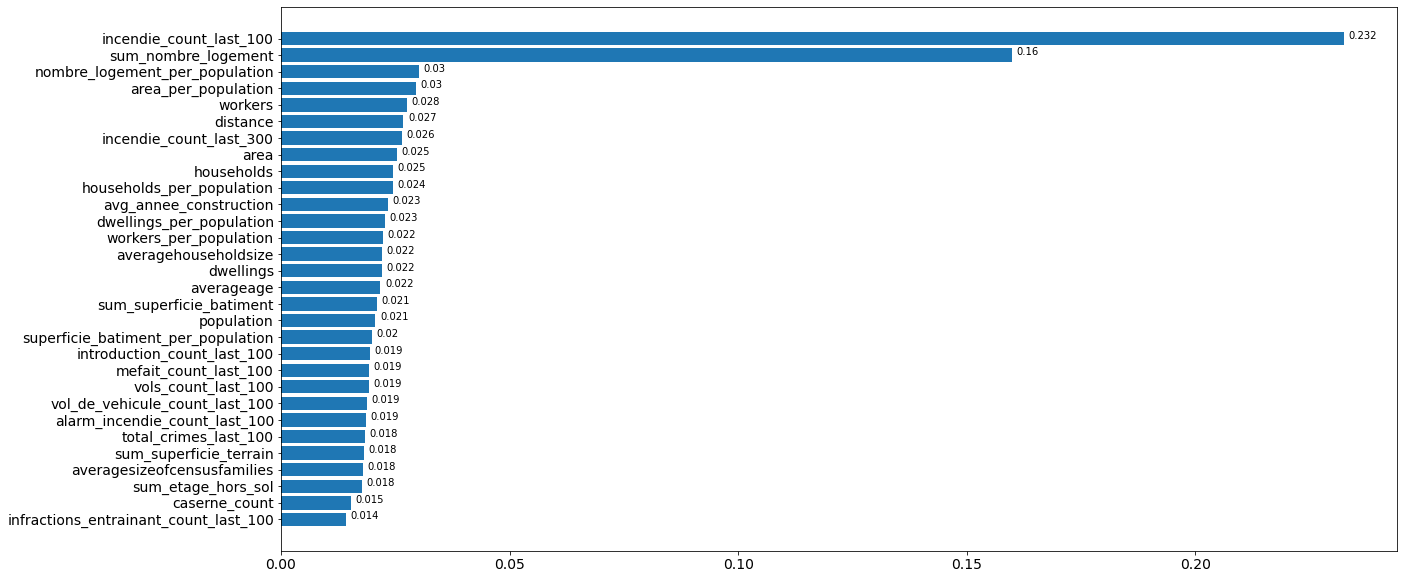

In [ ]:
plt.figure(figsize=(20,10))
sorted_idx = final_xgb.feature_importances_.argsort()
plt.barh(X_raw.columns[sorted_idx], final_xgb.feature_importances_[sorted_idx])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("", fontsize=20)

for index, value in enumerate(final_xgb.feature_importances_[sorted_idx]):
    plt.text(value+0.001, index, str(round(value,3)))

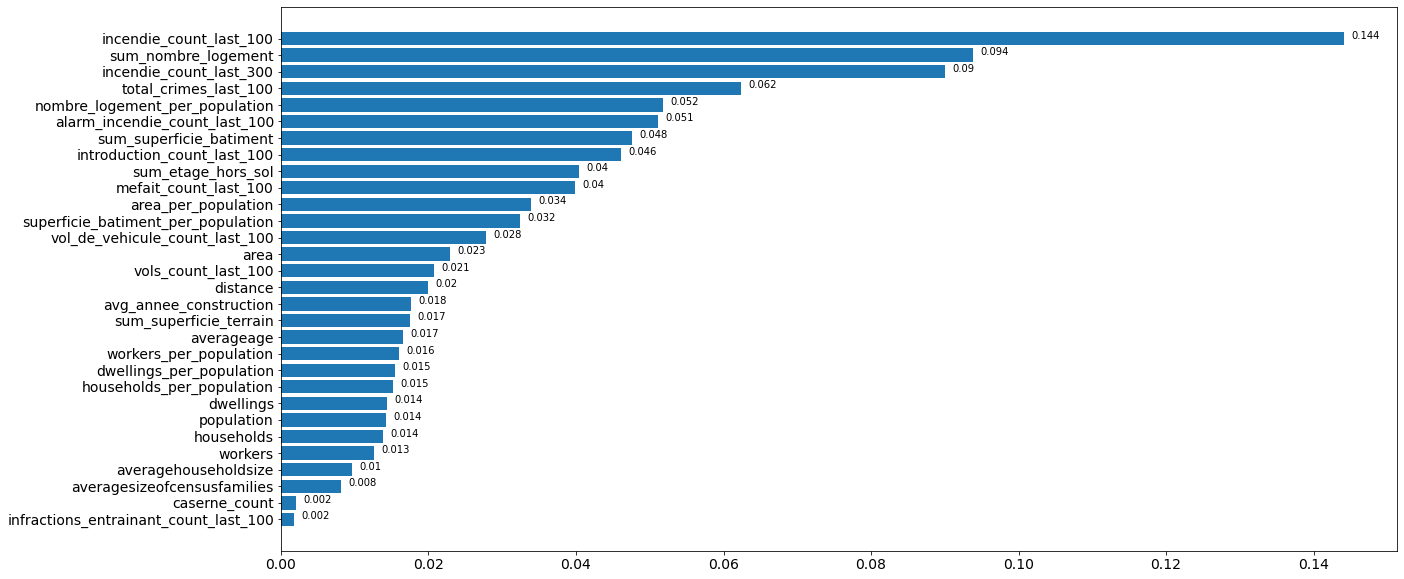

In [ ]:
plt.figure(figsize=(20,10))
sorted_idx = final_rf.feature_importances_.argsort()
plt.barh(X_raw.columns[sorted_idx], final_rf.feature_importances_[sorted_idx])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("", fontsize=20)

for index, value in enumerate(final_rf.feature_importances_[sorted_idx]):
    plt.text(value+0.001, index, str(round(value,3)))

In [ ]:
df3.head()

,sum_etage_hors_sol,sum_nombre_logement,avg_annee_construction,sum_superficie_terrain,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers,caserne_count,total_crimes_last_100,vols_count_last_100,mefait_count_last_100,vol_de_vehicule_count_last_100,introduction_count_last_100,infractions_entrainant_count_last_100,vol_moteur_count_last_100,distance,fire
0,0,0,1900.000000,2732,1.57174,352,162,149,2.3,42.0,2.7,100,0,0,0,0,0,0,0,0,32,0
1,0,0,1900.000000,2732,1.57174,352,162,149,2.3,42.0,2.7,100,0,1,0,1,0,0,0,0,32,0
2,728,730,1949.980392,253537,0.21093,314,7,0,0.0,91.6,0.0,0,0,2,0,0,1,1,0,0,31,0
3,728,730,1949.980392,253537,0.21093,314,7,0,0.0,91.6,0.0,0,0,4,1,2,0,0,0,1,31,0
4,728,730,1949.980392,253537,0.21093,314,7,0,0.0,91.6,0.0,0,0,5,0,0,2,1,0,2,31,0


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
# for correlation heatmap
